### Contrary to what most data science courses would have you believe, not every dataset is a perfectly curated group of observations with no missing values or outliers (For example mtcars and iris datasets). Real-world data is messy which means we need to clean and wrangle it into an acceptable format before we can even start the analysis. Data cleaning is an un-glamorous, but necessary part of most actual data science problems. In this notebook, I will try to explain what are outliers and it's types, how to detect outliers and also remidial measures for outliers 

### Please do upvote the notebook if you find it insightful!

### I hope that you find the notebook useful, let me know what you think in the comments section below and connect me on LinkedIn @ [Suraj RP](https://www.linkedin.com/in/suraj-rp/)

#### Let's start by importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

from pathlib import Path
data_dir = Path('../input/images')

# What are outliers?

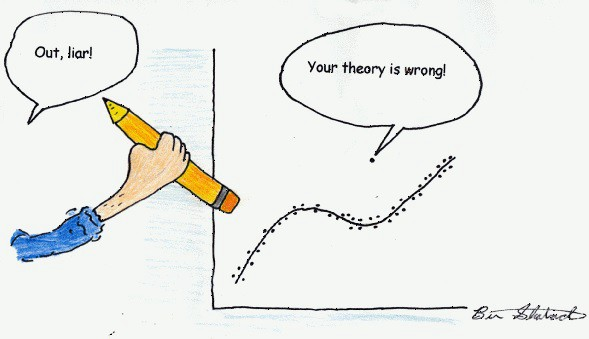

In [2]:
Image(filename=data_dir/'O2.jpeg')

#### I will try to explain it in a simplified manner
### An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. It is also called anomalies.

#### Outliers can have many causes, such as:

#### - Measurement or input error.
#### - Data corruption.
#### - True outlier observation.

#### There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.

#### Nevertheless, we can use statistical methods to identify observations that appear to be rare or unlikely given the available data. This does not mean that the values identified are outliers and should be removed. A good tip is to consider plotting the identified outlier values, perhaps in the context of non-outlier values to see if there are any systematic relationships or patterns to the outliers. If there is, perhaps they are not outliers and can be explained, or perhaps the outliers themselves can be identified more systematically.

<img src="https://media.giphy.com/media/bWlBE4EgQrXb2/giphy.gif">

# Types of outliers:

### Outlier can be of two types: 
### 1) Univariate 
### 2) Multivariate. 

#### Univariate outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

#### Let us understand this with an example. Let us say we are understanding the relationship between height and weight. Below, we have univariate and bivariate distribution for Height, Weight. Take a look at the box plot. We do not have any outlier (above and below 1.5*IQR, most common method). Now look at the scatter plot. Here, we have two values below and one above the average in a specific segment of weight and height.

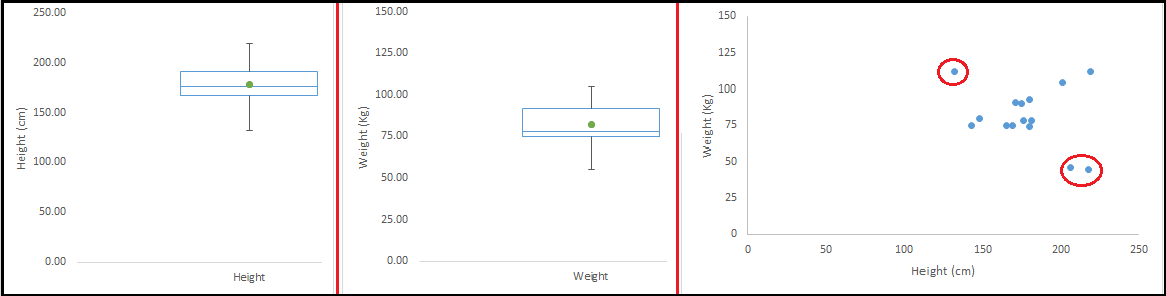

In [3]:
Image(filename=data_dir/'O5.png')

## What is the impact of Outliers on a dataset?

#### Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:

#### - It increases the error variance and reduces the power of statistical tests
#### - If the outliers are non-randomly distributed, they can decrease normality
#### - They can bias or influence estimates that may be of substantive interest
#### - They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

#### To understand the impact deeply, let’s take an example to check what happens to a data set with and without outliers in the data set.

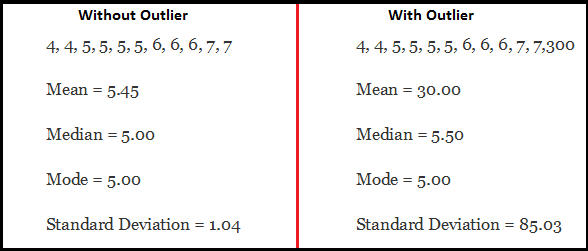

In [4]:
Image(filename=data_dir/'O6.png')

#### As you can see, data set with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 5.45. But with the outlier, average soars to 30. This would change the estimate completely.

### Further to give examples on outlier detection and remidial measures, I'll take up a few datasets to work on

# Outlier Detection Techniques:

## A) Univariate Outliers:

In [5]:
df_1 = pd.read_csv("../input/heart-disease-uci/heart.csv")
df_1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### I will perform basic EDA to analyse the Data Frame

In [6]:
df_1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There are no null values in the data frame

In [7]:
df_1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Let's consider serum cholestoral in mg/dl column i.e. "chol" for our analysis. I'll plot a simple box plot which is the best visualization for detecting outliers

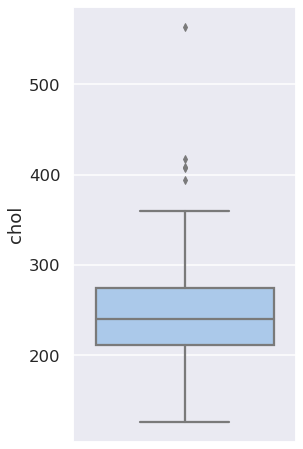

In [8]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df_1.chol)

#### From the above box plot, we can surely observe that there are outliers in it!

# 1) Interquartile Range Method

#### The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.

#### In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.

####  It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. It can be visually represented by the box plot.

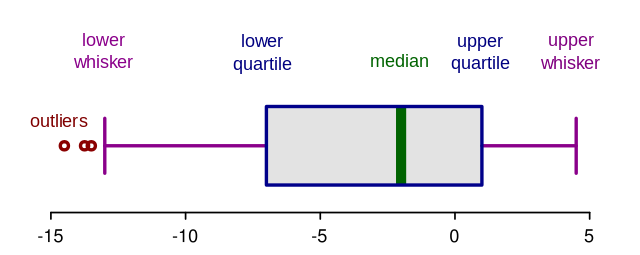

In [9]:
Image(filename=data_dir/'O3.png')

#### Let's define a function to find out the IQR, lower and the upper whisker.

In [10]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

### For example, I'll take up the [Heart disease UCI DataSet](https://www.kaggle.com/ronitf/heart-disease-uci) for explaining IQR method.

In [11]:
out_iqr(df_1,'chol')
#Input the dataset and the required column

The IQR is 63.5
The lower bound value is 115.75
The upper bound value is 369.75
Total number of outliers are 5


### As per the IQR method, there are 5 outliers.

### Visual representation:

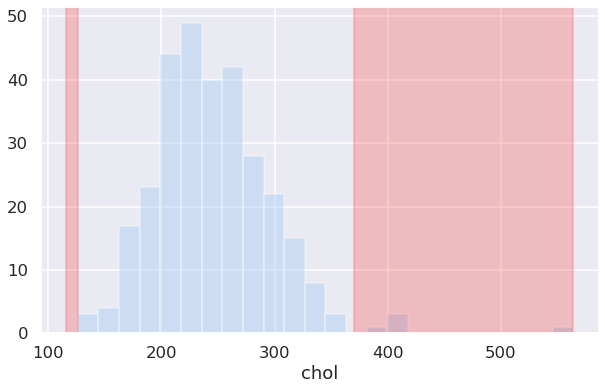

In [12]:
plt.figure(figsize = (10,6))
sns.distplot(df_1.chol, kde=False)
plt.axvspan(xmin = lower,xmax= df_1.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_1.chol.max(),alpha=0.2, color='red')

#### Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

### Remedial Measure:
#### Remove the records which are above the upper bound value and records below the lower bound value!

In [13]:
#Data Frame without outliers
df_new = df_1[(df_1['chol'] < upper) | (df_1['chol'] > lower)]

# 2) Standard Deviation Method

#### Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean. In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

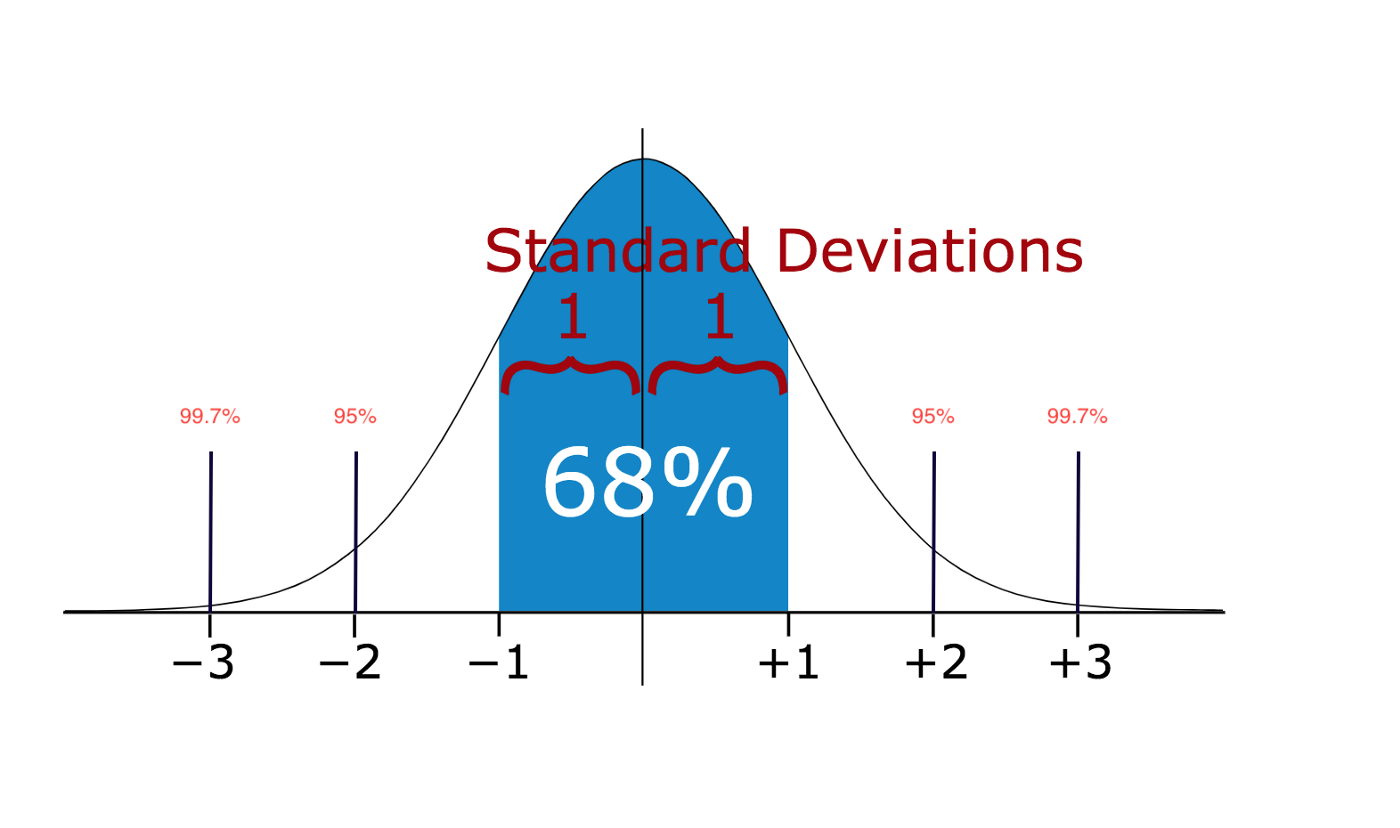

In [14]:
Image(filename=data_dir/'O4.png')

#### For example, I'll take up the [Student Performance in Exam DataSet](https://www.kaggle.com/spscientist/students-performance-in-exams) for explaining SDM.

In [15]:
df_2 = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")
df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Let's consider the "writing score" for inspection.  I'll plot a simple density plot which is also one of the best visualization for detecting outliers

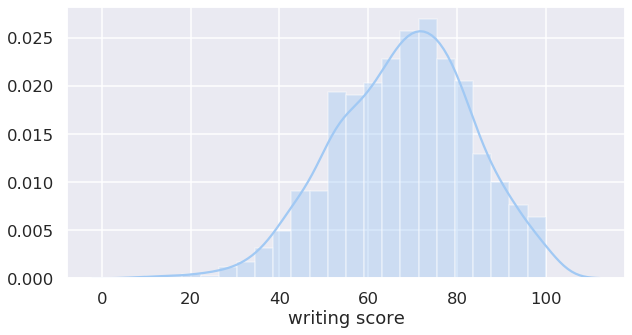

In [16]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'])

#### By the looks of it, it is left tailed and it surely has outliers.

#### Let's define a function to find out the lower and the upper whisker using SDM:

In [17]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [18]:
out_std(df_2,'writing score')

The lower bound value is 22.467028967391073
The upper bound value is 113.64097103260893
Total number of outliers are 4


### So as per the SD method, there are 4 ouliters

### Visual Representation:

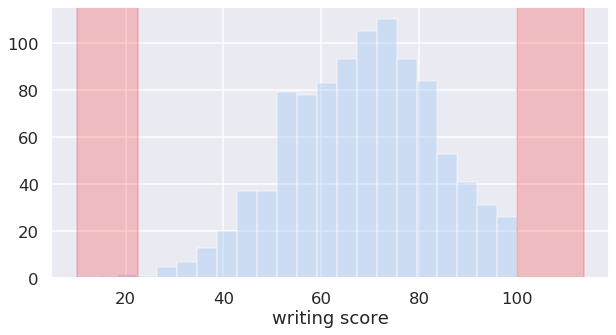

In [19]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'], kde=False)
plt.axvspan(xmin = lower,xmax= df_2['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_2['writing score'].max(),alpha=0.2, color='red')

#### Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

### Remedial Measure:
#### Remove the records which are above the upper bound value and records below the lower bound value!

In [20]:
#Data Frame without outliers
df_new = df_2[(df_2['writing score'] < upper) | (df_2['writing score'] > lower)]

# 3) Z-Score method:

#### The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

#### The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

#### You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

#### This technique assumes a Gaussian distribution of the data. The outliers are the data points that are in the tails of the distribution and therefore far from the mean. How far depends on a set threshold zthr for the normalized data points zi calculated with the formula: 

###                      Z_score= (Xi - mean) / standard deviation 

#### where Xi is a data point, 'mean' is the mean of all X and 'standard deviation' the standard deviation of all X.

#### An outlier is then a normalized data point which has an absolute value greater than Zthr. That is:

###                                     |Z_score| > Zthr

#### Commonly used Zthr values are 2.5, 3.0 and 3.5. Here we will be using 3.0

#### For example, I'll take up the [TMedical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) for explaining Z-Score method.

In [21]:
df_3 = pd.read_csv("../input/insurance/insurance.csv")
df_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Let's perform basic EDA to analyse the dataset

In [22]:
df_3.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
df_3.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Let's consider the "charges" for inspection.  I'll plot a simple density plot which is one of the best visualization for detecting outliers

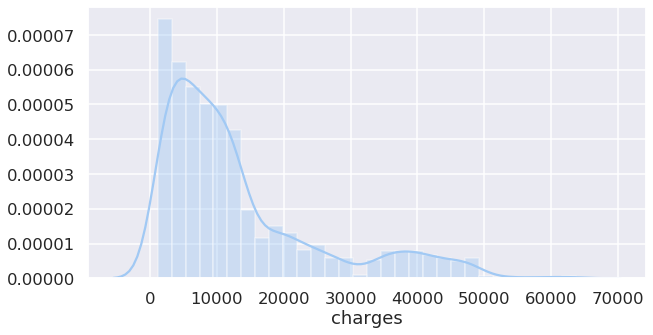

In [24]:
plt.figure(figsize = (10,5))
sns.distplot(df_3['charges'])

#### By the looks of it, it is right tailed and it surely has outliers.

#### Let's define a function to find out the lower and the upper whisker using Z-Score method:

In [25]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [26]:
out_zscore(df_3.charges)

Total number of outliers are 7


### According to z-score method, it has 7 outliers

### Visual Representation:

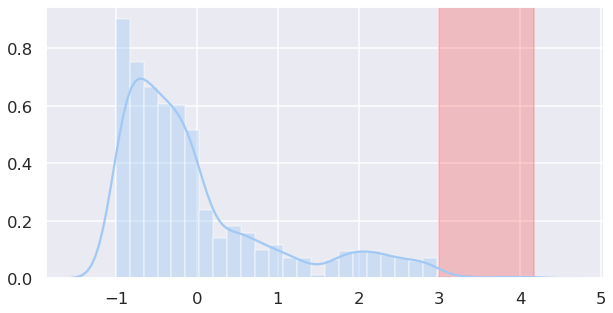

In [27]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

#### Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

### Remedial Measure:
#### Remove the records which are above the upper bound value and records below the lower bound value!

In [28]:
#Data Frame without outliers
df_new = df_3[(df_3['charges'] < 3) | (df_3['charges'] > -3)]

### Let's move to some advanced methods of outlier detection 

# 4) Isolation Forest

#### Isolation forest is an algorithm to detect outliers. It partitions the data using a set of trees and provides an anomaly score looking at how isolated the point is in the structure found. The anomaly score is then used to tell apart outliers from normal observations. 

#### An important concept in this method is the isolation number. The isolation number is the number of splits needed to isolate a data point. This number of splits is ascertained by following these steps:

#### - A point “a” to isolate is selected randomly.
#### - A random data point “b” is selected that is between the minimum and maximum value and different from “a”.
#### - If the value of “b” is lower than the value of “a”, the value of “b” becomes the new lower limit.
#### - If the value of “b” is greater than the value of “a”, the value of “b” becomes the new upper limit.
#### - This procedure is repeated as long as there are data points other than “a” between the upper and the lower limit. 

#### It requires fewer splits to isolate an outlier than it does to isolate a non-outlier, i.e. an outlier has a lower isolation number in comparison to a non-outlier point. A data point is therefore defined as an outlier if its isolation number is lower than the threshold. The threshold is defined based on the estimated percentage of outliers in the data, which is the starting point of this outlier detection algorithm. 

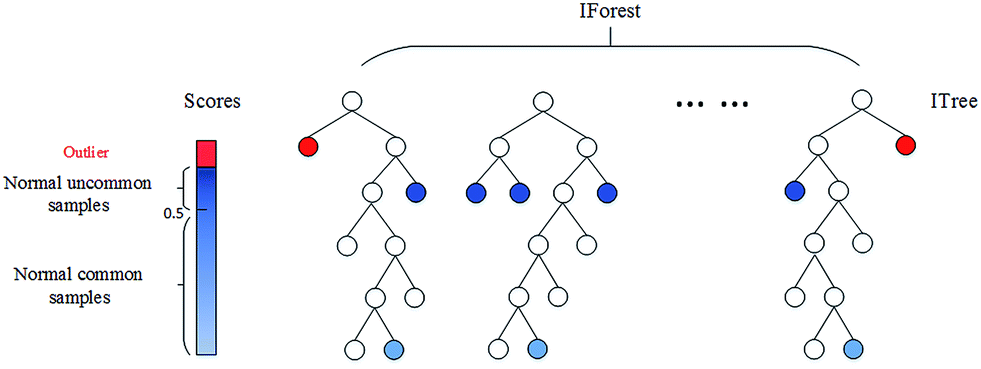

In [29]:
Image(filename=data_dir/'O8.png')

#### Let's consider the students performance dataset for analysis.

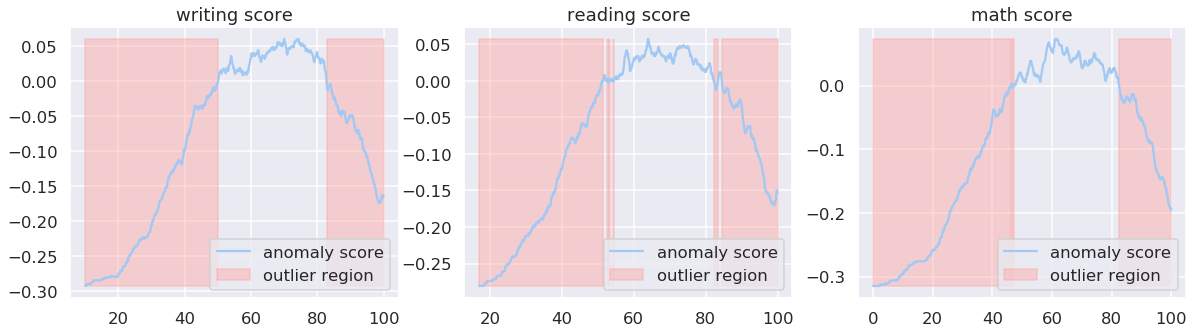

In [30]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
cols = ['writing score','reading score','math score']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df_2[column].values.reshape(-1,1))

    xx = np.linspace(df_2[column].min(), df_2[column].max(), len(df_2)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

#### In the snippet above, we have trained our IsolationForest using the data generated, computed the anomaly score for each observation, and classified each observation as an outlier or non-outlier. The chart shows the anomaly scores and the regions where the outliers are. As expected, the anomaly score reflects the shape of the underlying distribution and the outlier regions correspond to low probability areas.

## B) Mulitivariate Outliers:

# 1) DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

#### This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance.

#### I will show you an example of using DBScan but before we start, let’s cover some important concepts. DBScan has three important concepts:

#### - Core Points: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP) is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is 'eps'. 'eps' is the maximum distance between two samples for them to be considered as in the same cluster.
#### - Border Points are in the same cluster as core points but much further away from the centre of the cluster.
#### - Everything else is called Noise Points, those are data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation. Now, let’s see some code.

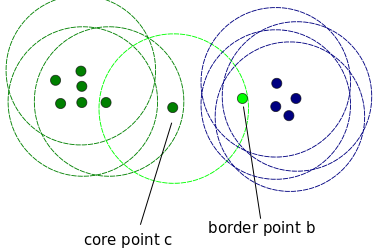

In [31]:
Image(filename=data_dir/'O9.png')

#### I'll consider the 'age' and 'bmi' columns of the insurance dataset for evaluation.

In [32]:
X = df_3[['age','bmi']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [33]:
pd.Series(labels).value_counts()

 0    1312
-1      26
dtype: int64

### Here the -1's represent the outliers! 

#### Let's plot to differentiate the outliers. I'll set the blue colour to normal records and red colour to outliers.

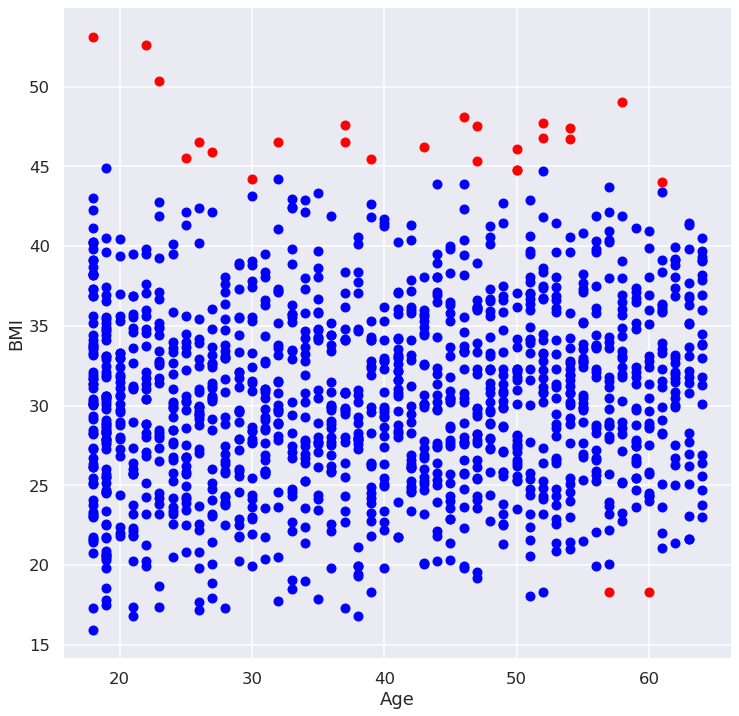

In [34]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Age');
plt.ylabel('BMI');

#### The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

# 2) Local Outlier Factor Method(LOF):

#### LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF value for an observation, the more anomalous the observation.

#### This is useful because not all methods will not identify a point that’s an outlier relative to a nearby cluster of points (a local outlier) if that whole region is not an outlying region in the global space of data points.

#### A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors.

#### In the below feature space, LOF is able to identify P1 and P2 as outliers, which are local outliers to Cluster 2 (in addition to P3).

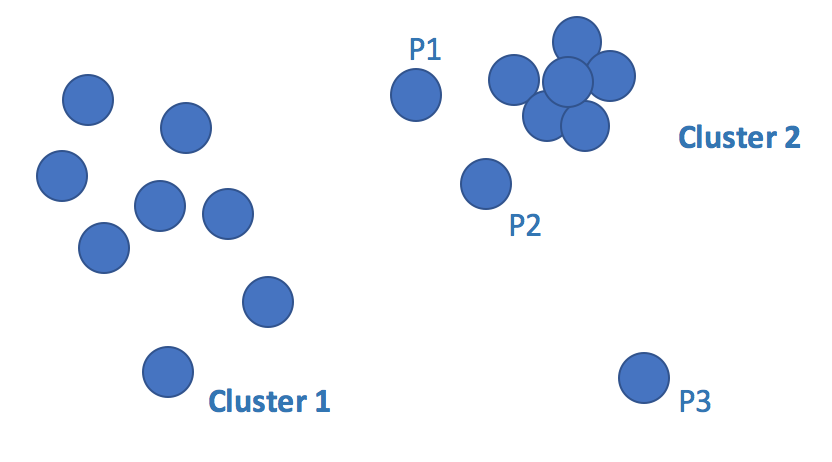

In [35]:
Image(filename=data_dir/'O10.png')

#### I'll consider the 'age' and 'chol' of the heart diseases dataset for the multivariate analysis!

In [36]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df_1[['age','chol']].values
y_pred = clf.fit_predict(X)

#### Now let's plot and visualize the outliers. I've set blue for the normal records and red for outliers

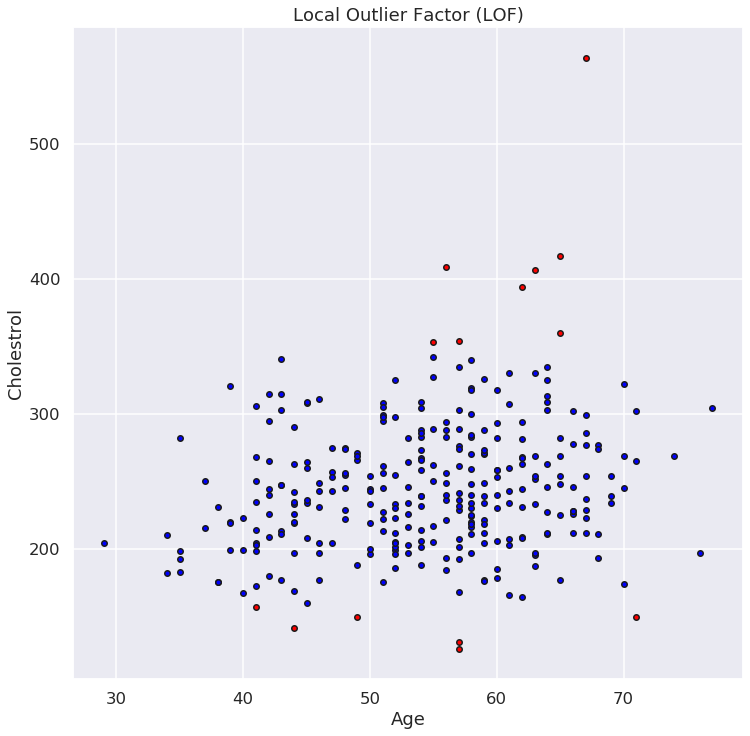

In [37]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

## Conclusion:

#### While outlier removal forms an essential part of a dataset normalization, it’s important to ensure zero errors in the assumptions that influence outlier removal. Data with even significant number of outliers may not always be bad data and a rigorous investigation of the dataset in itself is often warranted, but overlooked, by data scientists in their processes.

#### There are some more advanced outlier detection processes like:

#### 1) Elliptic Envelope [https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html]
#### 2) One-Class Support Vector Machines [http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/]
#### 3) Robust Random Cut Forest [https://github.com/awslabs/amazon-sagemaker-examples/tree/master/introduction_to_amazon_algorithms/random_cut_forest]

#### We live in a world where the data is getting bigger by the second. The value of the data can diminish over time if not used properly. Finding anomalies in a dataset is crucial to identifying problems in the business or building a proactive solution to potentially discover the problem before it happens or even in the exploratory data analysis (EDA) phase to prepare a dataset for ML. 

### I hope that you find the notebook useful, let me know what you think in the comments section below and connect me on LinkedIn @ [Suraj RP](https://www.linkedin.com/in/suraj-rp/)

